<a href="https://colab.research.google.com/github/sultanardian/Deep-Learning-and-Data-Science/blob/main/Joki_Bunga.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install Augmentor

In [ ]:
import cv2
import os
# import Augmentor as aug
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime
from google.colab.patches import cv2_imshow
from hashlib import md5
from PIL import Image
from tqdm import tqdm

In [ ]:
path_master = "/content/drive/MyDrive/Job/Joki/bunga/"

# Read dataset

In [ ]:
def resize_and_collect(path, cls):
    path_collection = os.path.join(path_master, "all_dataset")
    if not os.path.exists(path_collection):
        cv2.mkdir(path_collection)

    new_filename = f"{md5(path.encode()).hexdigest()}.png"

    img = cv2.imread(path)
    res_img = cv2.resize(img, (256, 256))

    cls_path = os.path.join(path_collection, cls)
    if not os.path.exists(cls_path):
        os.mkdir(cls_path)

    cv2.imwrite(os.path.join(cls_path, new_filename), res_img)
    return res_img


def read_dataset(paths, collect = True):
    datasets = {}

    for cls, paths in paths.items():
        print(f"Processing {cls}")
        datasets[cls] = []
        for path in tqdm(paths):
            if collect:
                datasets[cls].append(resize_and_collect(path, cls))
            else:
                datasets[cls].append(cv2.imread(path))

    return datasets

def list_images(clses):
    paths = {}

    for cls, abs_path in clses.items():
        files = os.listdir(abs_path)
        paths[cls] = [os.path.join(abs_path, f) for f in files]

    return paths

## Dataset `cataract1`

In [ ]:
paths_cataract1 = {
    'normal' : os.path.join(path_master, "cataract1/dataset/1_normal"),
    'cataract' : os.path.join(path_master, "cataract1/dataset/2_cataract")
}
paths_cataract1 = list_images(paths_cataract1)

In [ ]:
dataset_cataract1 = read_dataset(paths_cataract1)

Processing normal


100%|██████████| 300/300 [00:43<00:00,  6.90it/s]


Processing cataract


100%|██████████| 100/100 [00:14<00:00,  6.89it/s]


## Dataset `cataract2`

In [ ]:
paths_cataract2 = {
    'normal' : os.path.join(path_master, "cataract2/dataset/normal"),
    'cataract' : os.path.join(path_master, "cataract2/dataset/cataract")
}
paths_cataract2 = list_images(paths_cataract2)

In [ ]:
dataset_cataract2 = read_dataset(paths_cataract2)

Processing normal


100%|██████████| 1074/1074 [00:41<00:00, 25.87it/s]


Processing cataract


100%|██████████| 1038/1038 [04:51<00:00,  3.56it/s]


## Dataset `cataract3`

In [ ]:
paths_raw_cataract3 = [os.path.join(path_master, 'cataract3/ODIR-5K/ODIR-5K/Testing Images'),
                       os.path.join(path_master, 'cataract3/ODIR-5K/ODIR-5K/Training Images')]
ref = pd.read_csv(os.path.join(path_master, 'cataract3/full_df.csv'))
paths_cataract3 = {}

subj = ['normal fundus', 'cataract']
cols = {
    'Left-Fundus' : 'Left-Diagnostic Keywords',
    'Right-Fundus' : 'Right-Diagnostic Keywords'
}
for s in subj:
    paths_cataract3[s] = []
    for _, row in ref.iterrows():
        for k, v in cols.items():
            if s == row[v].lower():
                for path in paths_raw_cataract3:
                    img_path = os.path.join(path, row[k])
                    if os.path.exists(img_path):
                        paths_cataract3[s].append(img_path)

In [ ]:
paths_cataract3['normal'] = paths_cataract3['normal fundus']
del paths_cataract3['normal fundus']

In [ ]:
dataset_cataract3 = read_dataset(paths_cataract3)

Processing cataract


100%|██████████| 518/518 [00:42<00:00, 12.09it/s]


Processing normal


100%|██████████| 5501/5501 [16:47<00:00,  5.46it/s]


# Preprocessing

## Read clean dataset

In [ ]:
dataset_path = {
    'normal' : os.path.join(path_master, 'all_dataset/normal'),
    'cataract' : os.path.join(path_master, 'all_dataset/cataract')
}

dataset_images = list_images(dataset_path)

In [ ]:
len(dataset_images['normal']), len(dataset_images['cataract'])

(4140, 1400)

In [ ]:
dataset = read_dataset(dataset_images, collect = False)

Processing normal


100%|██████████| 4140/4140 [01:30<00:00, 45.56it/s] 


Processing cataract


100%|██████████| 1400/1400 [07:31<00:00,  3.10it/s]


In [ ]:
aug_folder = os.path.join(path_master, 'aug_imgs')
if not os.path.exists(aug_folder):
    os.mkdir(aug_folder)

## Flip Augmentation

In [ ]:
for path, img in tqdm(zip(dataset_images['cataract'], dataset['cataract'])):
    filename = os.path.basename(path)
    cls_path = os.path.join(aug_folder, 'cataract')
    if not os.path.exists(cls_path):
        os.mkdir(cls_path)

    flipped = cv2.flip(img, 1)

    cv2.imwrite(os.path.join(cls_path, f"flip_{filename}"), flipped)

1400it [00:13, 100.60it/s]


## Rotation Augmentation

In [ ]:
for path, img in tqdm(zip(dataset_images['cataract'], dataset['cataract'])):
    filename = os.path.basename(path)
    cls_path = os.path.join(aug_folder, 'cataract')
    if not os.path.exists(cls_path):
        os.mkdir(cls_path)

    rotated = cv2.rotate(img, cv2.ROTATE_180)

    cv2.imwrite(os.path.join(cls_path, f"rotate_{filename}"), rotated)

1400it [00:14, 96.29it/s] 


## Original

In [ ]:
for path, img in tqdm(zip(dataset_images['cataract'], dataset['cataract'])):
    filename = os.path.basename(path)
    cls_path = os.path.join(aug_folder, 'cataract')
    if not os.path.exists(cls_path):
        os.mkdir(cls_path)

    cv2.imwrite(os.path.join(cls_path, f"ori_{filename}"), img)

1400it [00:15, 92.14it/s]


In [ ]:
for path, img in tqdm(zip(dataset_images['normal'], dataset['normal'])):
    filename = os.path.basename(path)
    cls_path = os.path.join(aug_folder, 'normal')
    if not os.path.exists(cls_path):
        os.mkdir(cls_path)

    cv2.imwrite(os.path.join(cls_path, f"ori_{filename}"), img)

4140it [00:52, 79.15it/s]


## Reread dataset

In [ ]:
dataset_aug_path = {
    'normal' : os.path.join(path_master, 'aug_imgs/normal'),
    'cataract' : os.path.join(path_master, 'aug_imgs/cataract')
}

dataset_aug_images = list_images(dataset_aug_path)

In [ ]:
len(dataset_aug_images['normal']), len(dataset_aug_images['cataract'])

(4140, 4200)

In [ ]:
aug_dataset = read_dataset(dataset_aug_images, collect = False)

Processing normal


100%|██████████| 4140/4140 [01:39<00:00, 41.42it/s] 


Processing cataract


100%|██████████| 4200/4200 [37:53<00:00,  1.85it/s]


## Remove background

In [ ]:
def remove_bg(img):
    alpha = np.sum(img, axis=-1) > 0
    alpha = np.uint8(alpha * 255)
    result = np.dstack((img, alpha))
    return result

In [ ]:
removed_img = {}

for cls in aug_dataset:
    removed_img[cls] = []
    for img in tqdm(aug_dataset[cls]):
        removed_img[cls].append(remove_bg(img))

100%|██████████| 4200/4200 [00:10<00:00, 385.17it/s]


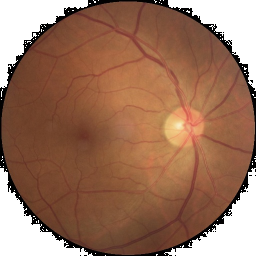

In [ ]:
cv2_imshow(removed_img['normal'][2971])

## Sharpen images

In [ ]:
def sharpen_img(img):
    kernel = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
    return cv2.filter2D(img, -1, kernel)

In [ ]:
sharpened_img = {}

for cls in removed_img:
    sharpened_img[cls] = []
    for img in tqdm(removed_img[cls]):
        sharpened_img[cls].append(sharpen_img(img))

100%|██████████| 4200/4200 [00:01<00:00, 2144.94it/s]


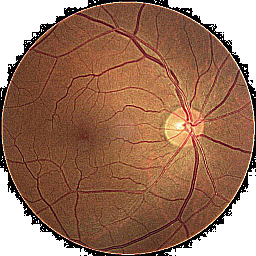

In [ ]:
cv2_imshow(sharpened_img['normal'][2971])

## Save preprocessed images

In [ ]:
preprocessed_path = os.path.join(path_master, 'preprocessed_imgs')
if not os.path.exists(preprocessed_path):
    os.mkdir(preprocessed_path)

for cls in sharpened_img:
    cls_path = os.path.join(preprocessed_path, cls)
    if not os.path.exists(cls_path):
        os.mkdir(cls_path)

    for img, src_path in tqdm(zip(sharpened_img[cls], dataset_aug_images[cls])):
        filename = f"{md5(os.path.basename(src_path).encode()).hexdigest()}.png"
        path = os.path.join(cls_path, filename)
        cv2.imwrite(path, img)

4140it [00:48, 85.32it/s]
4200it [00:51, 81.80it/s]


# Modelling

In [3]:
from tensorflow.keras.applications import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [6]:
model = Sequential()

# 1st layer as the lumpsum weights from resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5
# NOTE that this layer will be set below as NOT TRAINABLE, i.e., use it as is
model.add(ResNet50(include_top = False, pooling = 'avg'))

94765736/94765736 [==============================] - 0s 0us/step


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
Total params: 23587712 (89.98 MB)
Trainable params: 23534592 (89.78 MB)
Non-trainable params: 53120 (207.50 KB)
_________________________________________________________________


In [ ]:
img = datasets['normal'][0]
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, alpha = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY)
b, g, r = cv2.split(img)
rgba = [b, g, r, alpha]
dst = cv2.merge(rgba, 10)
cv2_imshow(dst)

In [ ]:
img = os.path.join(path_master, 'all_dataset/normal/7473ffce44f918d953ab3f684afa2580.png')
img = cv2.imread(img)
# kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
kernel = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
sharpened_image = cv2.filter2D(img, -1, kernel)

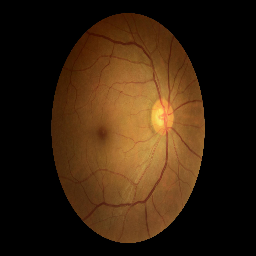

In [ ]:
cv2_imshow(img)

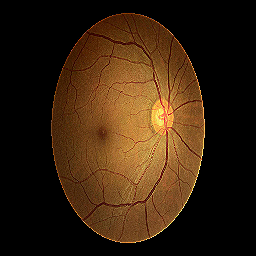

In [ ]:
cv2_imshow(sharpened_image)

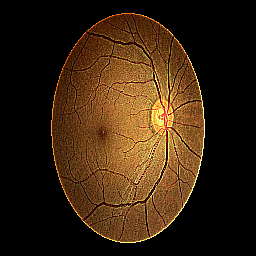

In [ ]:
cv2_imshow(sharpened_image)